 # Word2Vec 词向量模型的分析及可视化
 做三件事：  
 * 主成分分析
 * 成对的词的词向量的对应关系
 * 词向量的相关性分析

In [1]:
import os
import gensim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

os.chdir('G:/我的项目/w2v_model')  #配置工作路径
os.getcwd()

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


'G:\\我的项目\\w2v_model'

In [2]:
def model_load(model_dir):
    model_type = os.path.splitext(model_dir)[-1]
    if model_type == '.gz' or model_type == '.bin':
        model = gensim.models.KeyedVectors.load_word2vec_format(model_dir, binary=True)
    else:
        model = gensim.models.Word2Vec.load(model_dir)
    return model

In [3]:
# 载入词向量模型
model1_dir = './my_news_model_size200_win5'
model2_dir = './my_news_model_size400_win5'
model3_dir = './word2vec_779845.bin'

model1 = model_load(model1_dir)
model2 = model_load(model2_dir)
model3 = model_load(model3_dir)

## 主成分分析

* 选取一些不同类别的词，进行主成分分析，如下表所示

In [62]:
# 读取数据
word_data = pd.read_excel('../data/word.xlsx')
word_data # [6, 7]

,0,1,2,3,4,5,6
0,酸,中国,北京,足球,洗澡,生气,数学
1,甜,美国,上海,篮球,睡觉,愤怒,英语
2,鲜,日本,纽约,乒乓球,吃饭,伤心,语文
3,咸,德国,成都,羽毛球,喝水,悲伤,化学
4,辣,南非,洛杉矶,橄榄球,散步,开心,生物
5,苦,墨西哥,东京,游泳,刷牙,厌恶,物理


In [63]:
words = []
labels = []
for i in range(7):
    words.extend(list(word_data[i]))
    labels.extend([i]*6)

In [64]:
word_vectors = [model1.wv[word] for word in words]
word_vectors = np.array(word_vectors)
word_vectors.shape

(42, 200)

In [65]:
pca=PCA(n_components=2)
reduced_wv=pca.fit_transform(word_vectors)
reduced_wv.shape

(42, 2)

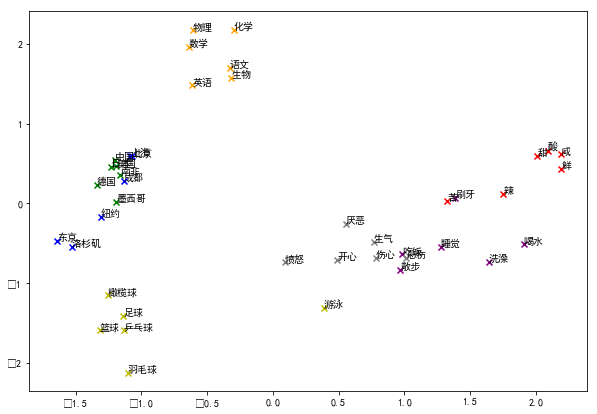

In [71]:
plt.rcParams['font.sans-serif']=['SimHei']  # 显示中文
plt.figure(figsize=(10, 7))
colors = ['r', 'g', 'b', 'y', 'purple', 'grey', 'orange'] # 分别对应 7 个类
for i in range(7):
    plt.scatter(reduced_wv[i*6:(i+1)*6, 0], reduced_wv[i*6:(i+1)*6, 1], c=colors[i], marker='x')
for i in range(42):
    plt.annotate(words[i],(reduced_wv[i,0], reduced_wv[i,1]))
plt.show()

## 成对的词向量的对应关系
* 展示几对有相关对应关系的词的词向量
* 作图试试效果，发现效果不行

In [75]:
model1.wv.most_similar(positive=['男人', '男孩'], negative=['女人'])  

[('女孩', 0.5978807210922241),
 ('孩子', 0.5473445653915405),
 ('女孩子', 0.5164199471473694),
 ('妈妈', 0.4991588592529297),
 ('少男少女', 0.4840826988220215),
 ('娃娃', 0.48124992847442627),
 ('男生', 0.47845596075057983),
 ('宝宝', 0.4762493371963501),
 ('小学生', 0.474548876285553),
 ('同龄', 0.46975159645080566)]

In [83]:
model1.wv.most_similar(positive=['女王', '女人'], negative=['国王'])  

[('男人', 0.7024085521697998),
 ('女孩子', 0.5559526681900024),
 ('她们', 0.5473035573959351),
 ('女子', 0.5407193899154663),
 ('小帅哥', 0.5370581746101379),
 ('女孩', 0.5316846370697021),
 ('风情万种', 0.530553936958313),
 ('老公', 0.5066920518875122),
 ('已婚', 0.5053443312644958),
 ('性无能', 0.4997332692146301)]

In [79]:
model1.wv.most_similar(positive=['任天堂', 'Wii'], negative=['索尼'])  

[('Revolution', 0.4801178574562073),
 ('PS3', 0.46778205037117004),
 ('游戏机', 0.45218202471733093),
 ('Anywhere', 0.4372313320636749),
 ('Xbox', 0.433488130569458),
 ('意指', 0.41062748432159424),
 ('双内核', 0.3991053104400635),
 ('Search', 0.39206457138061523),
 ('IE7.0', 0.3891012966632843),
 ('canard', 0.3866819441318512)]

In [95]:
word_test = ['男人','男孩','王子','国王','女人','女孩','公主','女王','高','矮','胖','瘦','美','丑','高兴','悲伤','微笑','哭泣']
word_test_vec = [model1.wv[word] for word in word_test]
reduced_wv2=pca.fit_transform(word_test_vec)
reduced_wv2.shape

(18, 2)

In [ ]:
plt.rcParams['font.sans-serif']=['SimHei']  # 显示中文
plt.figure(figsize=(10, 7))
plt.scatter(reduced_wv2[:, 0], reduced_wv2[:, 1], c='r', marker='x')
for i in range(len(word_test)):
    plt.annotate(word_test[i],(reduced_wv2[i,0], reduced_wv2[i,1]))
plt.show()

效果不行啊算了

## 词向量的相关性分析
* 结合人的对词语的相关性判断分析模型结果，作图

In [156]:
pair_word = pd.read_excel('../data/pair_word.xlsx')
pair_word

,A,B,similarity
0,桌子,板凳,8
1,键盘,鼠标,7
2,苹果,橙子,8
3,西瓜,哈密瓜,8
4,羊肉,牛肉,8
5,项链,手链,7
6,茶叶,果汁,6
7,咖啡,糖,5
8,茶,咖啡,7
9,钥匙,锁,8


In [153]:
corr = [model1.wv.similarity(a,b) for a,b in zip(pair_word['A'], pair_word['B'])]
pair_word['correlation'] = corr

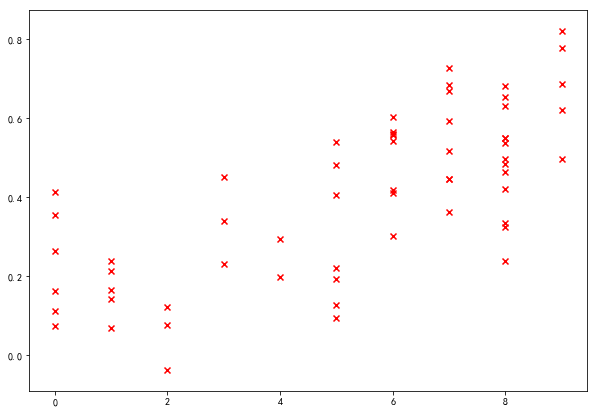

In [154]:
plt.rcParams['font.sans-serif']=['SimHei']  # 显示中文
plt.figure(figsize=(10, 7))
plt.scatter(pair_word['similarity'],pair_word['correlation'], c='r', marker='x')
plt.show()